In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt

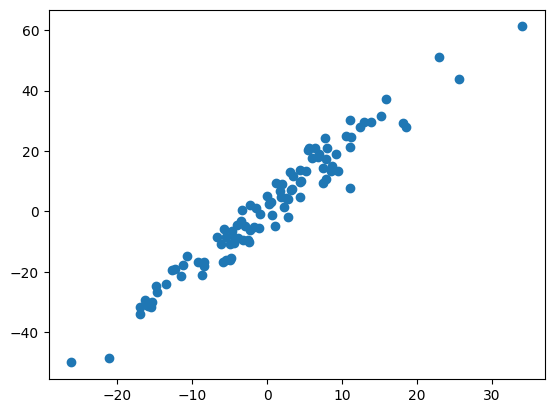

In [6]:
# generate data
torch.manual_seed(0)
x = torch.randn(100, 1) * 10
y = 2*x + torch.randn(100, 1)*5

In [60]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(1, 1)
    
    def forward(self, x):
        x = self.layer(x)
        return x
        

In [61]:
epochs = 1000
for epoch in range(epochs):
    model = LinearRegression()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    optimizer.zero_grad()
    loss = nn.MSELoss()
    pred = model(x)
    loss = loss(pred, y)
    loss.backward()
    optimizer.step()
    # Log progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 327.8668
Epoch [200/1000], Loss: 301.8557
Epoch [300/1000], Loss: 134.8896
Epoch [400/1000], Loss: 912.5519
Epoch [500/1000], Loss: 539.3864
Epoch [600/1000], Loss: 792.0023
Epoch [700/1000], Loss: 179.1596
Epoch [800/1000], Loss: 630.6171
Epoch [900/1000], Loss: 687.8055
Epoch [1000/1000], Loss: 123.9581


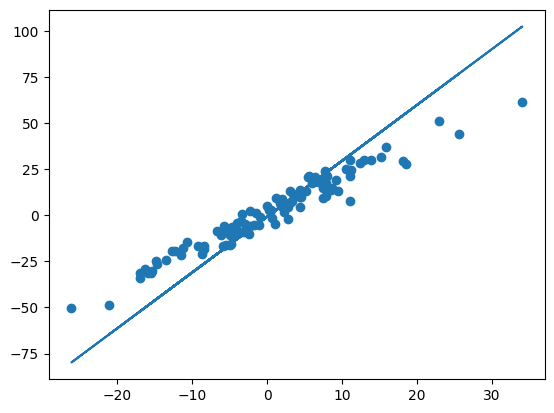

In [62]:
with torch.no_grad():
    y_pred = model(x)
plt.figure()
plt.scatter(x, y)
plt.plot(x, y_pred)